## 00 |

The objective of this **project** is to define the profile of the most profitable customers, based on a collection of **9.134** customer data, including demographics and buying behaviour.

In [1]:
# 📚 Basic libraries
import os # file managment
import pandas as pd # data manipulation
import numpy as np # numerical operations
import math # math in-build
import matplotlib.pyplot as plt # 2D visualization
import seaborn as sns # HD visualization
import warnings # warning messages managment

# 🤖 Machine Learning
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # splitting data into train/test sets
from sklearn.linear_model import LinearRegression # logistic model
from sklearn.linear_model import ElasticNet, Lasso, Ridge # Regression model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # model evaluation metrics

# ⚙️ Settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore') # ignore warnings

# 🔄 Functions
import sys # system path to our functions
sys.path.append("C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/unit_4_py/lab-cleaning-numerical-data")

from easy.functions import open_data # quick data overview
from easy.functions import snake_columns # snake_case
from easy.functions import explore_data # checks for duplicates, NaN & empty spaces

In [2]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/unit_4_py/lab-cleaning-numerical-data/01_data/X_N.csv")
X_N = pd.read_csv(file_path)

## 05 | Modeling

### X-Y Split

In [3]:
X_N.isnull().sum()

Unnamed: 0                       0
response                         0
coverage                         0
education                        0
policy_type                      0
policy                           0
vehicle_size                     0
year                             0
month                            0
day                              0
unnamed:_0                       0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [4]:
# We need to be careful about when and how we do the split.
X_N.dropna(inplace=True) # Droping nulls, we got an error when we tried to model
Y = X_N['total_claim_amount']
X = X_N.drop(['total_claim_amount'], axis=1)

### Train-Test Split

In [5]:
# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [6]:
len(X) # Len before the test

9134

In [7]:
len(X_test) # Len after testing 30% of X data

2741

In [8]:
len(X_train) # Len after training 70% of X data

6393

In [9]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

## 06 | Model Validation

In [10]:
predictions = model.predict(X_test)

In [11]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)


(0.5352173441359012, 194.7876040393055, 37942.21068737327)

In [12]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

R2 =  0.5352173441359012
RMSE =  194.7876040393055
The value of the metric MSE is  37942.21068737327
MAE =  140.09204709152866


In [13]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results.head(5)

,true,pred,diff
708,218.598065,412.822443,194.224378
47,447.793440,402.656041,45.137399
3995,451.200000,268.383995,182.816005
1513,355.641958,305.211191,50.430767
3686,470.097411,383.474499,86.622912


<AxesSubplot:xlabel='true', ylabel='pred'>

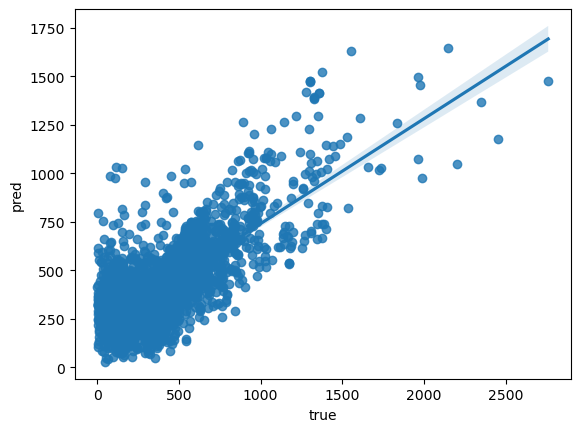

In [14]:
sns.regplot(results['true'], results['pred'])